<a href="https://colab.research.google.com/github/garimaj02/Multiple-Disease-Prediction-System/blob/main/Copy_of_corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/corona.csv',encoding='ISO-8859-1')

In [3]:
df.head()


,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


Data Preprocessing

In [4]:
# function to convert the data

def convert(x):
    if x=='TRUE':
        return 'true'
    elif x==True:
        return 'true'
    elif x=='FALSE' or x==False:
        return 'false'
    else:
        return x

In [5]:
# mapping the function

df['Cough_symptoms'] = df['Cough_symptoms'].map(convert)
df['Fever'] = df['Fever'].map(convert)
df['Sore_throat'] = df['Sore_throat'].map(convert)
df['Shortness_of_breath'] = df['Shortness_of_breath'].map(convert)
df['Headache'] = df['Headache'].map(convert)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51156 entries, 0 to 51155
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ind_ID               51156 non-null  int64 
 1   Cough_symptoms       51156 non-null  object
 2   Fever                51156 non-null  object
 3   Sore_throat          51156 non-null  object
 4   Shortness_of_breath  51156 non-null  object
 5   Headache             51156 non-null  object
 6   Corona               51155 non-null  object
 7   Age_60_above         51155 non-null  object
 8   Sex                  51155 non-null  object
 9   Known_contact        51155 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [7]:
# replacing the none values with Nan values

df.replace({'None': np.nan}, inplace=True)

In [8]:
df.isnull().sum()

Ind_ID                     0
Cough_symptoms            23
Fever                     23
Sore_throat                1
Shortness_of_breath        1
Headache                   1
Corona                     1
Age_60_above            4513
Sex                    14762
Known_contact              1
dtype: int64

In [9]:
# Dropping the nan values from columns

df.dropna(subset=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache'],axis=0,inplace=True)

In [10]:
# dropping the age_60_above column

df.drop('Age_60_above',axis=1,inplace=True)

In [11]:
# # replacing the none values with Nan values

df.replace({'other': np.nan},inplace=True)

In [12]:
# Dropping the nan values from columns

df.dropna(subset=['Corona'],axis=0,inplace=True)

In [13]:
# converting the datatype as categorical

for i in df.columns:
    if i=='Ind_ID' or i == 'Test_date':
        pass
    else:
        df[i] = df[i].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50176 entries, 0 to 51154
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Ind_ID               50176 non-null  int64   
 1   Cough_symptoms       50176 non-null  category
 2   Fever                50176 non-null  category
 3   Sore_throat          50176 non-null  category
 4   Shortness_of_breath  50176 non-null  category
 5   Headache             50176 non-null  category
 6   Corona               50176 non-null  category
 7   Sex                  35699 non-null  category
 8   Known_contact        50176 non-null  category
dtypes: category(8), int64(1)
memory usage: 1.1 MB


Explorartory Data Analysis

In [15]:
sns.set_style('dark')

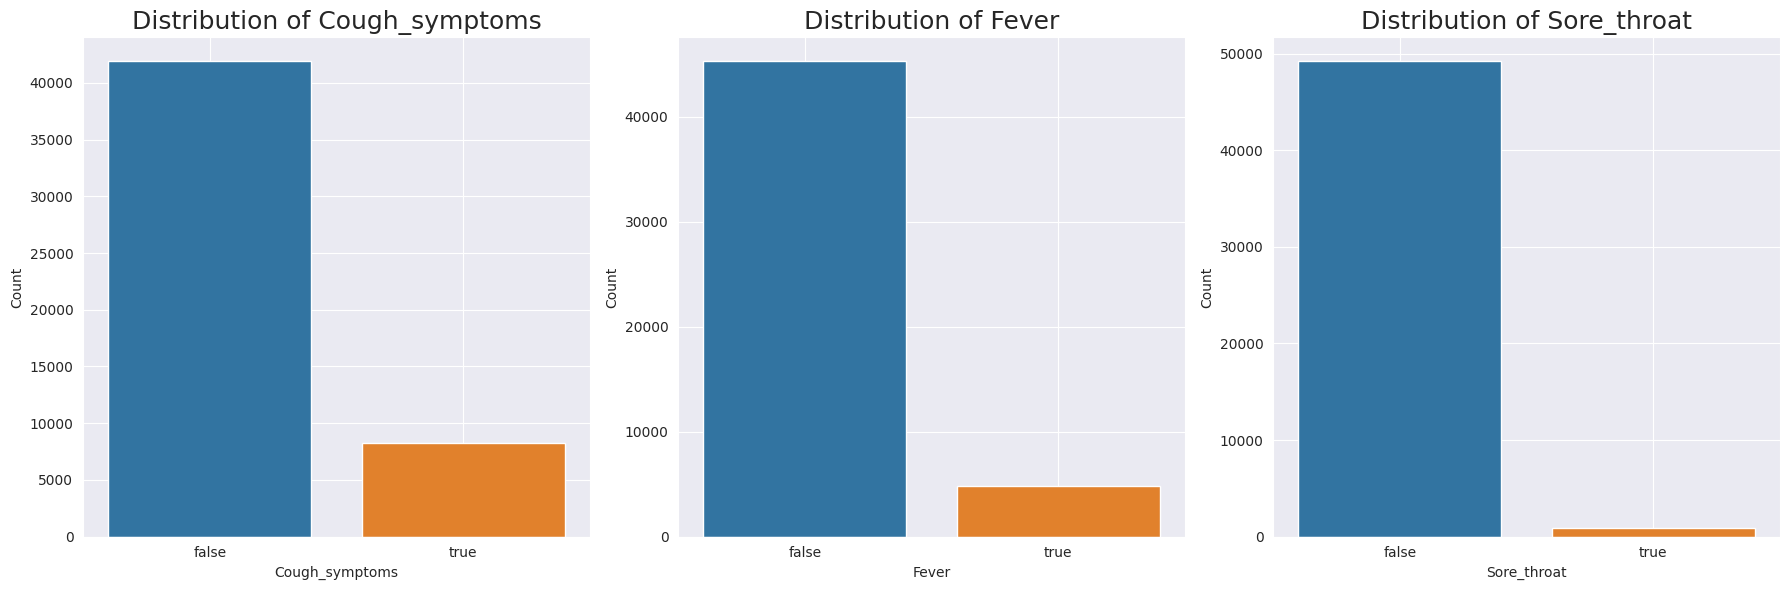

In [16]:
cols = ['Cough_symptoms', 'Fever', 'Sore_throat']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

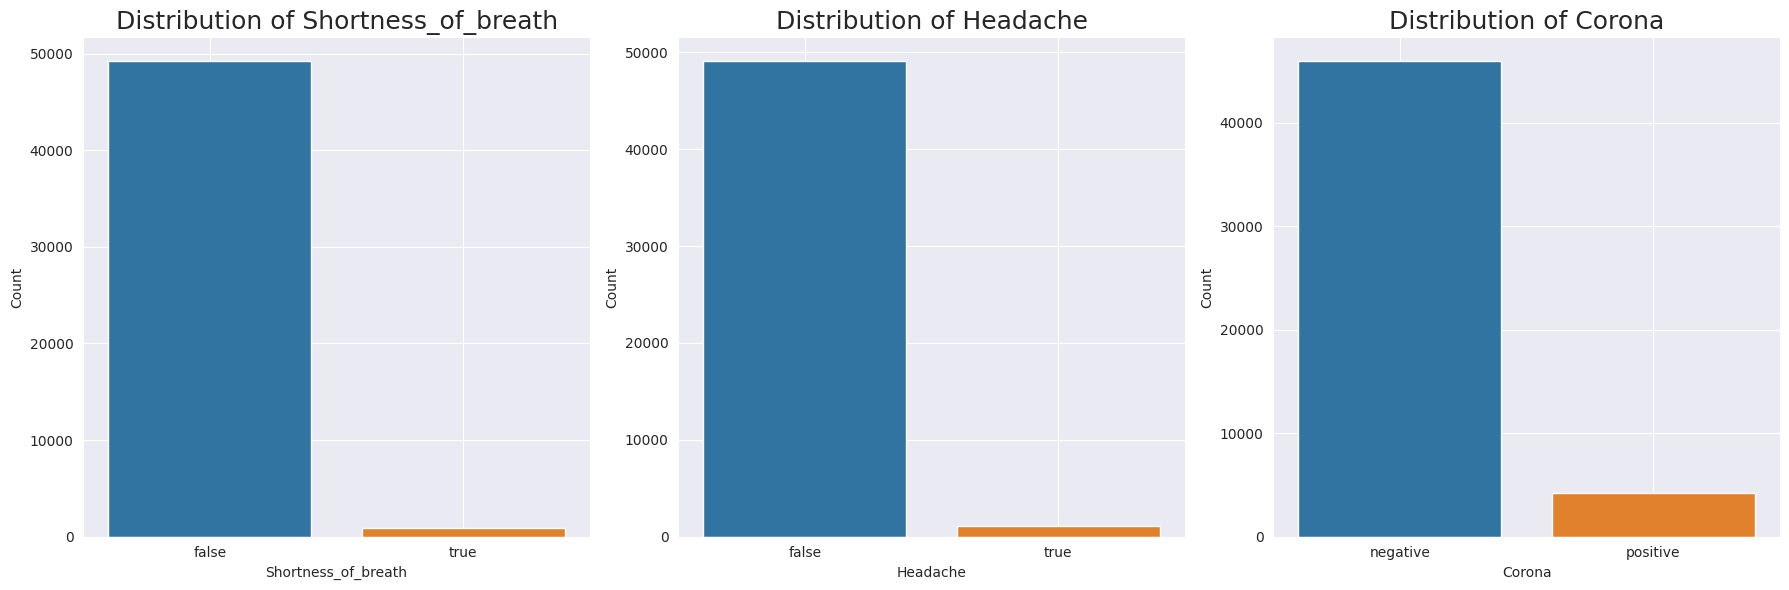

In [17]:
cols = ['Shortness_of_breath','Headache',	'Corona']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

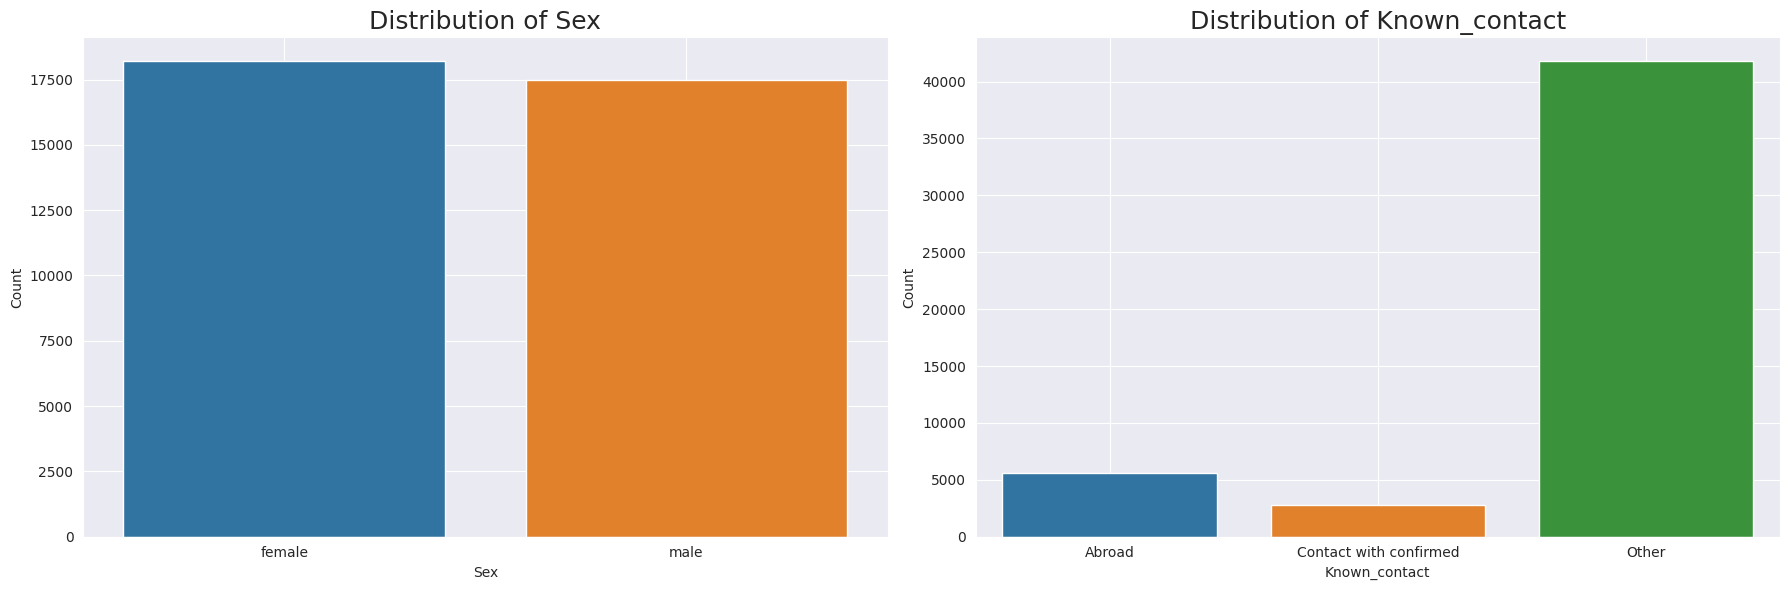

In [18]:
cols = ['Sex',	'Known_contact']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

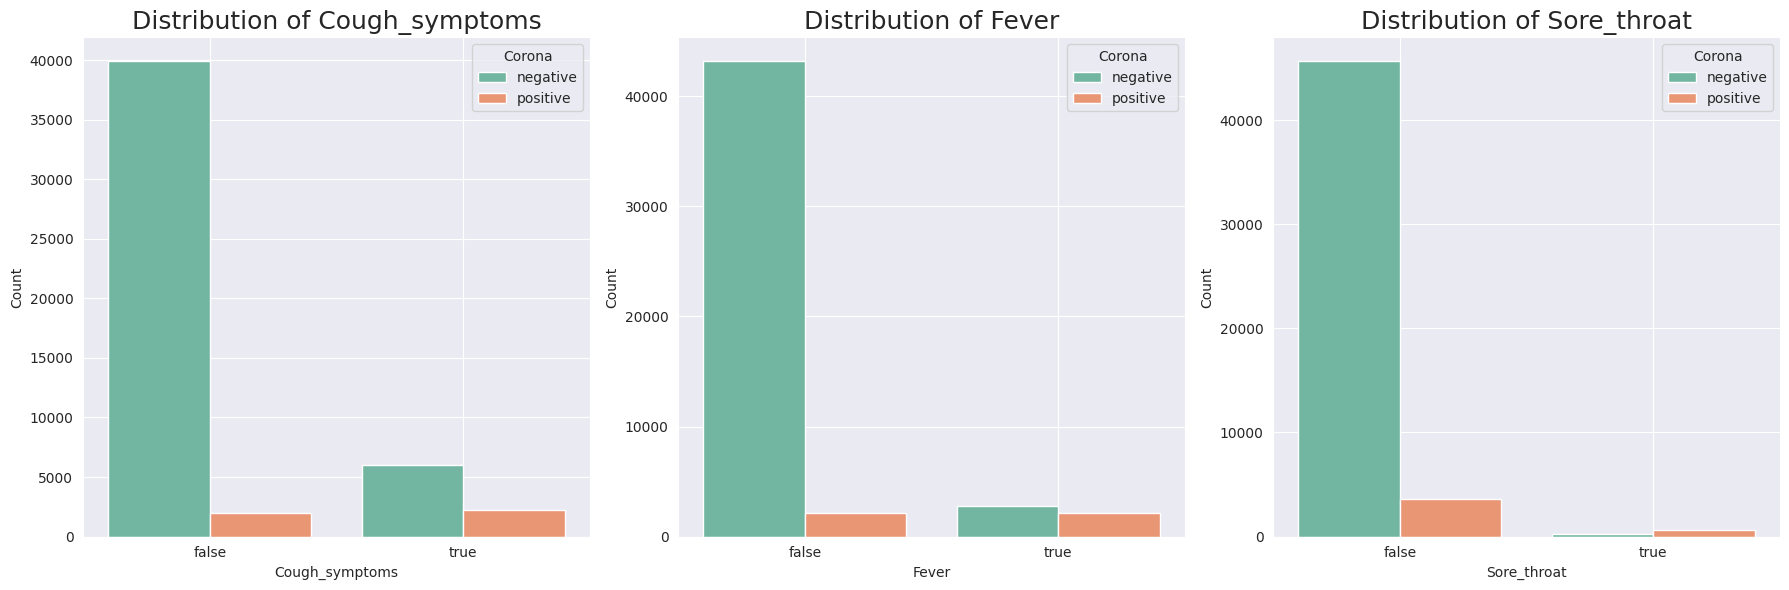

In [19]:
cols = ['Cough_symptoms', 'Fever', 'Sore_throat']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col,hue='Corona', ax=axes[i]  , palette="Set2")
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

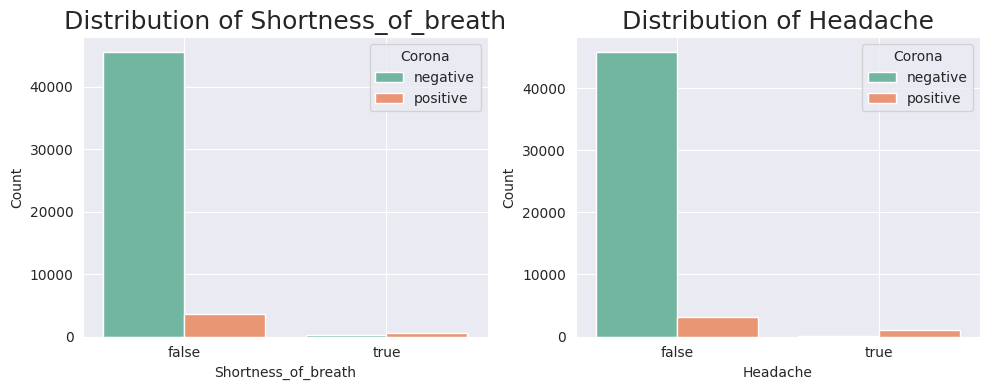

In [20]:
cols = ['Shortness_of_breath','Headache']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col,hue='Corona', ax=axes[i]  , palette="Set2")
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

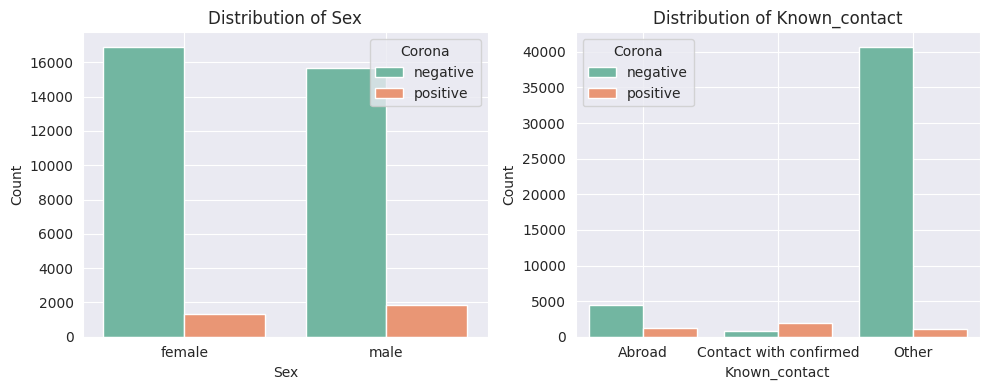

In [21]:
cols = ['Sex',	'Known_contact']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col,hue='Corona', ax=axes[i]  , palette="Set2")
    axes[i].set_title(f'Distribution of {col}' , fontsize=12 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Feature Transformation

In [22]:
# creating a copy of original dataframe

covid_df = df.copy(deep=True)

In [23]:
# Encoding

covid_df['Cough_symptoms'] = pd.get_dummies(covid_df['Cough_symptoms'],drop_first=True)  # to aviod multicolinearity

covid_df['Fever'] = pd.get_dummies(covid_df['Fever'],drop_first=True)

covid_df['Sore_throat'] = pd.get_dummies(covid_df['Sore_throat'],drop_first=True)

covid_df['Shortness_of_breath'] = pd.get_dummies(covid_df['Shortness_of_breath'],drop_first=True)

covid_df['Headache'] = pd.get_dummies(covid_df['Headache'],drop_first=True)

covid_df['Corona'] = pd.get_dummies(covid_df['Corona'],drop_first=True)

In [24]:
# encoding

covid_df['Sex'].replace({'male':0,'female':1},inplace=True)
covid_df['Known_contact'].replace({'Other':2,'Contact with confirmed':1,'Abroad':0},inplace=True)

In [25]:
covid_df.head()

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,1,0,1,0,0,0,NaN,0
1,2,0,1,0,0,0,1,NaN,0
2,3,0,1,0,0,0,1,NaN,0
3,4,1,0,0,0,0,0,NaN,0
4,5,1,0,0,0,0,0,NaN,1


In [26]:
covid_df.isnull().sum()

Ind_ID                     0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Sex                    14477
Known_contact              0
dtype: int64

Missing Value Impuatation

In [27]:
from sklearn.impute import KNNImputer

In [28]:
# creating a copy of original dataframe

imputed_data = covid_df.copy(deep=True)

In [29]:
# applying KNN imputation

knn=KNNImputer(n_neighbors=5,weights='uniform')
columns=['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath', 'Headache','Sex','Known_contact']
imputed=knn.fit_transform(covid_df[columns])

In [30]:
df1 = pd.DataFrame(imputed,columns=columns)

In [31]:
def change(x):
    if x>0.5:
        return 1
    elif x<0.5:
        return 0
    else:
        return x

In [32]:
df1['Sex'] = df1['Sex'].apply(change)

In [33]:
imputed_data['Sex'].iloc[:] =df1['Sex']

In [34]:
imputed_data.head()

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,1,0,1,0,0,0,0,0
1,2,0,1,0,0,0,1,0,0
2,3,0,1,0,0,0,1,0,0
3,4,1,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,1


In [35]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50176 entries, 0 to 51154
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Ind_ID               50176 non-null  int64   
 1   Cough_symptoms       50176 non-null  uint8   
 2   Fever                50176 non-null  uint8   
 3   Sore_throat          50176 non-null  uint8   
 4   Shortness_of_breath  50176 non-null  uint8   
 5   Headache             50176 non-null  uint8   
 6   Corona               50176 non-null  uint8   
 7   Sex                  50176 non-null  category
 8   Known_contact        50176 non-null  category
dtypes: category(2), int64(1), uint8(6)
memory usage: 1.1 MB


In [36]:
imputed_data['Sex'] = imputed_data['Sex'].astype('uint8')

In [37]:
# strong teh data in final df

final_data = imputed_data.astype('category')

In [38]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50176 entries, 0 to 51154
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Ind_ID               50176 non-null  category
 1   Cough_symptoms       50176 non-null  category
 2   Fever                50176 non-null  category
 3   Sore_throat          50176 non-null  category
 4   Shortness_of_breath  50176 non-null  category
 5   Headache             50176 non-null  category
 6   Corona               50176 non-null  category
 7   Sex                  50176 non-null  category
 8   Known_contact        50176 non-null  category
dtypes: category(9)
memory usage: 2.3 MB


Feature Engineering

In [39]:
# separating features and target variable

features = final_data.drop(['Ind_ID','Corona'],axis=1)

target = final_data['Corona']

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [41]:
# chi square method to select important k best features

selector = SelectKBest(score_func=chi2, k=6)

X_new = selector.fit_transform(features, target)

idxs_selected = selector.get_support(indices=True)

feat_names = features.columns[idxs_selected]

feat_names

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Known_contact'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split

# splitting train test set

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

In [43]:
y_test.value_counts()

0    13816
1     1237
Name: Corona, dtype: int64

In [44]:
y_train.value_counts()

0    32134
1     2989
Name: Corona, dtype: int64

Model Training

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score


In [46]:
lr = LogisticRegression(random_state=42)

In [47]:
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)


In [48]:
accuracy_lr = accuracy_score(y_test, pred_lr)
print("Accuracy:", accuracy_lr * 100)

Accuracy: 93.74211120706836


In [49]:
precision_lr = precision_score(y_test, pred_lr)
print("Precision:", precision_lr * 100)

# Recall
recall_lr = recall_score(y_test, pred_lr)
print("Recall:", recall_lr * 100)

# F1 score
f1_lr = f1_score(y_test, pred_lr)
print("F1 Score:", f1_lr * 100)

# Logistic Regression Grid Search
param_grid_lr = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

Precision: 77.06422018348624
Recall: 33.95311236863379
F1 Score: 47.13804713804714


In [50]:
import warnings
warnings.filterwarnings('ignore')

Hyper Parameter Tuning

In [51]:
scorer_lr = make_scorer(accuracy_score)

In [52]:
grid_obj_lr = GridSearchCV(lr, param_grid_lr, scoring=scorer_lr)


In [53]:
grid_fit_lr = grid_obj_lr.fit(x_train, y_train)



In [54]:
best_params_lr = grid_fit_lr.best_params_
print("Best Parameters for Logistic Regression:", best_params_lr)

# Logistic Regression with Best Parameters
lr_best = LogisticRegression(random_state=42, **best_params_lr)

lr_best.fit(x_train, y_train)

y_pred_lr = lr_best.predict(x_test)

Best Parameters for Logistic Regression: {'C': 0.001, 'penalty': 'none'}


In [55]:
import pickle



In [56]:

# Save the Logistic Regression model to a file using pickle
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_best, file)


In [57]:

# To load the Logistic Regression model later
with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_lr_model = pickle.load(file,encoding='ISO-8859-1')

In [58]:
import chardet

# Specify the path to your file
file_path = '/content/corona.csv'

# Open the file in binary mode and read a portion of it for detection
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(10000))  # Read the first 10,000 bytes for detection

# Retrieve the detected encoding
detected_encoding = result['encoding']
confidence = result['confidence']

print(f"Detected encoding: {detected_encoding} with confidence: {confidence}")

# Use the detected encoding to read the file
with open(file_path, 'r', encoding=detected_encoding) as f:
    content = f.read()

# Now 'content' contains the decoded text using the detected encoding


Detected encoding: ascii with confidence: 1.0
